In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

In [4]:
# 1. Cargar los datos
url = 'C:/Users/MIGUEL/Downloads/archive/car data.csv'  # Cambia a la ruta de tu archivo
data = pd.read_csv(url)

In [6]:
# 2. Análisis exploratorio de los datos
print(data.head())
print(data.describe())
print(data.info())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.32000

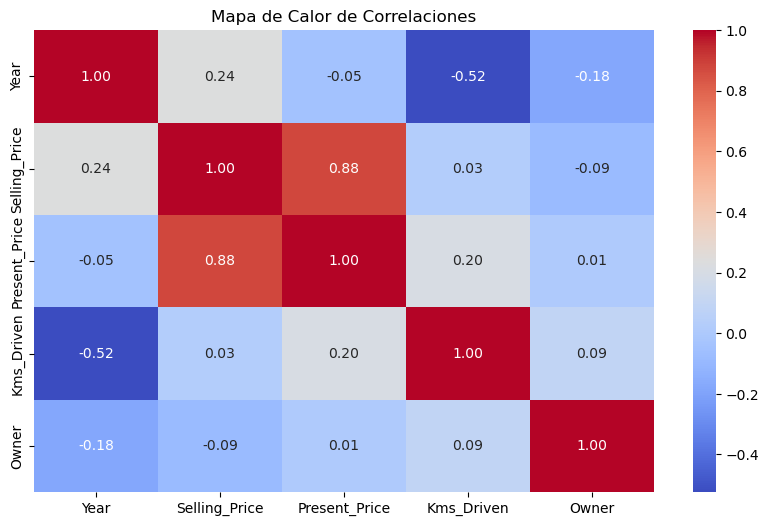

In [10]:
# Filtrar solo las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Visualizar correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [14]:
# 3. Preprocesamiento de datos
# Manejo de valores faltantes
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Seleccionar solo columnas numéricas
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())  # Rellenar NaN con la media

# Convertir variables categóricas a numéricas
label_encoders = {}
for column in ['Fuel_Type', 'Seller_Type', 'Transmission']:  # Cambia según tus columnas categóricas
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [20]:
X = data.select_dtypes(include=['int64', 'float64']).drop('Selling_Price', axis=1)
y = data['Selling_Price']


In [22]:
# 4. Seleccionar características relevantes
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']


In [30]:
X = data.select_dtypes(include=['int64', 'float64']).drop('Selling_Price', axis=1)
y = data['Selling_Price']


In [32]:
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [34]:
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')


In [37]:
# 5. Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

In [39]:
# 6. Entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [49]:
# Evaluar el modelo de Regresión Lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Regresión Lineal - MSE:", mse_linear)
print("Regresión Lineal - R²:", r2_linear)

Regresión Lineal - MSE: 4.122560047937085
Regresión Lineal - R²: 0.8210351448079884


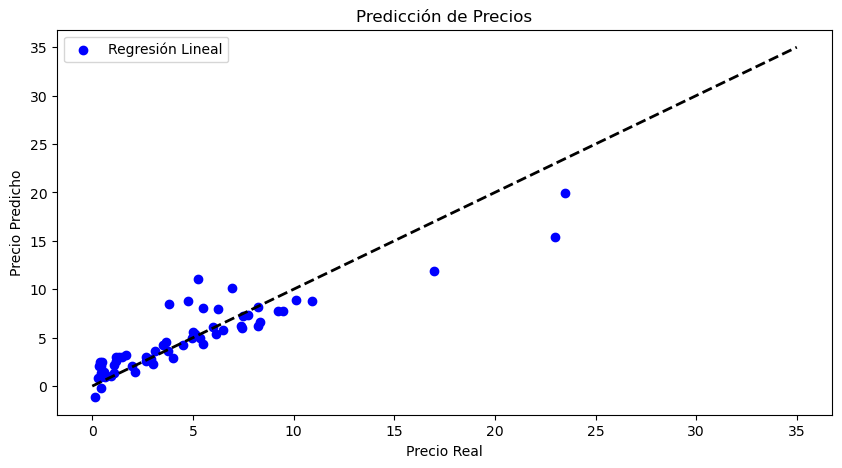

In [51]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', label='Regresión Lineal')
plt.plot([0, 35], [0, 35], color='black', lw=2, ls='--')  # Línea de referencia
plt.title('Predicción de Precios')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend()
plt.show()